In [4]:
import numpy as np

In [6]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
print("La longitud de datos es de= ", len(X))

La longitud de datos es de=  100


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

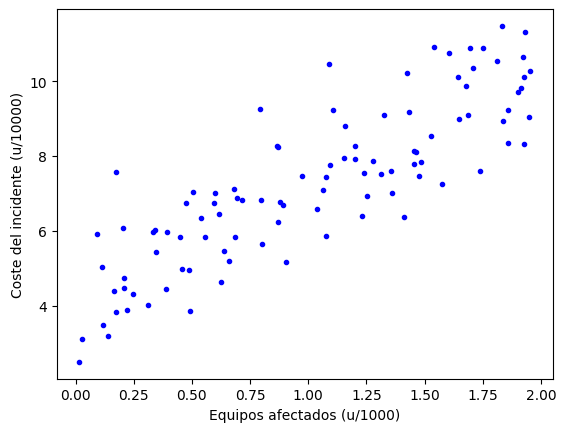

In [10]:
plt.plot(X,y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

In [11]:
import pandas as pd

In [12]:
#Convertir los datos a un diccionario
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.680800,7.123739
1,0.394145,5.978519
2,1.280099,7.870280
3,0.794295,9.252186
4,1.526462,8.521805
5,1.928001,10.102654
6,1.460897,8.093659
7,1.921607,10.654634
8,0.331497,5.966132
9,0.539170,6.348543


In [16]:
#Escalado de numero de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
#Escalado de coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,680,71237
1,394,59785
2,1280,78702
3,794,92521
4,1526,85218
5,1928,101026
6,1460,80936
7,1921,106546
8,331,59661
9,539,63485


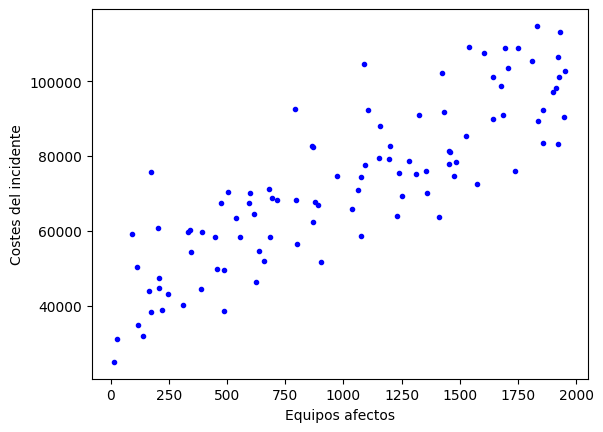

In [17]:
#Representacion grafica del conjunto de datos
plt.plot(df['n_equipos_afectados'],df['coste'],"b.")
plt.xlabel("Equipos afectos")
plt.ylabel("Costes del incidente")
plt.show()

In [18]:
#COnstruccion de modelo
from sklearn.linear_model import LinearRegression


In [19]:
#construccion de modelo y ajuste de la hipotesis ///fit se encarga de entrenar el algoritmo se inserta variable de entrada(equipos afectados) = X
#Y tambien la variable de salida que es (coste) = y    ES UN ALGORITMO DE APRENDIZAJE SUPERVISADO
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)


LinearRegression()

In [20]:
#parametro theta 0
lin_reg.intercept_

41644.42593789687

In [21]:
#parametro theta 1
lin_reg.coef_

array([30.59767941])

In [22]:
#prediccion para el valor minimo y macimo del conjunto de datos de entrenamiento
X_min_max = np.array([[df['n_equipos_afectados'].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)


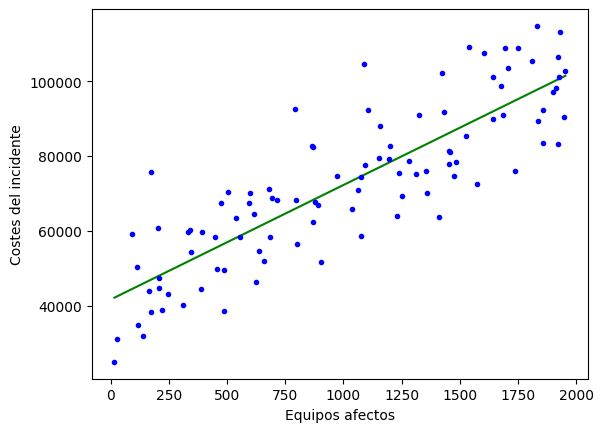

In [24]:
#representacion grafica de la hipotesis
plt.plot(X_min_max,y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'],df['coste'],"b.")
plt.xlabel("Equipos afectos")
plt.ylabel("Costes del incidente")
plt.show()

In [25]:
#predicciones en nuevos ejemplos
x_new = np.array([[1800]]) #1800 equipos afectados
#prediccion del coste
coste = lin_reg.predict(x_new)

print("El coste del incidente seria:", int(coste[0]), "USD")

El coste del incidente seria: 96720 USD


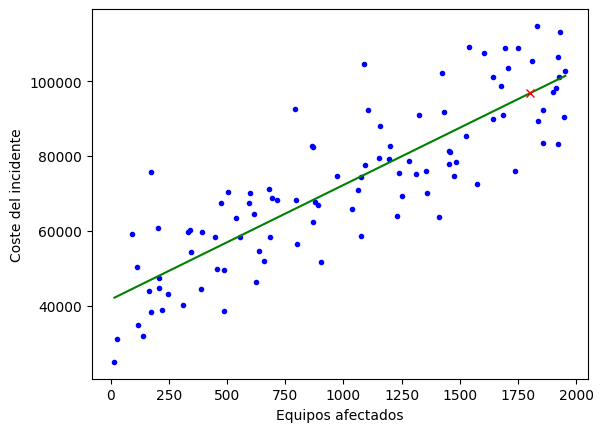

In [26]:
#Representacion grafica de la prediccion
plt.plot(df['n_equipos_afectados'],df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new,coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()